In [2]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    tesla_revenue = tesla_revenue.append(
                        {"Date": date, "Revenue": revenue}, ignore_index=True
                    )
        break

tesla_revenue.head()


,Date,Revenue


In [5]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    gme_revenue = gme_revenue.append(
                        {"Date": date, "Revenue": revenue}, ignore_index=True
                    )
        break

gme_revenue.head()



,Date,Revenue


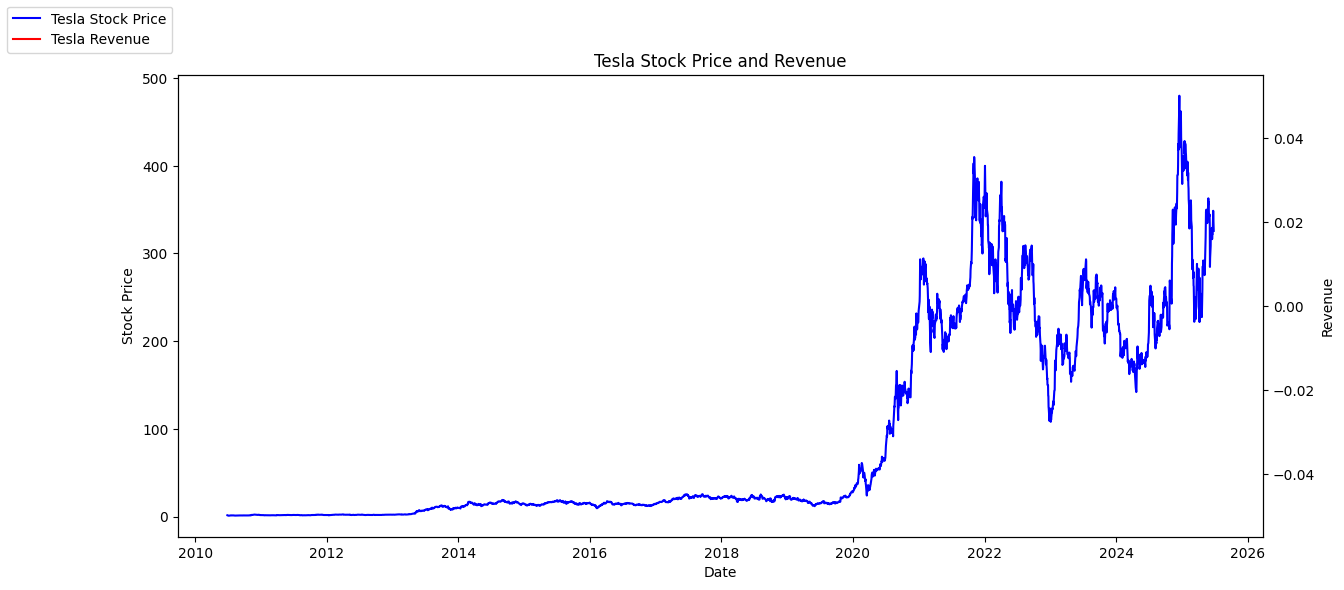

In [8]:
import matplotlib.pyplot as plt

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price', color='blue')
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'].astype(float), label='Tesla Revenue', color='red')

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax2.set_ylabel('Revenue')
plt.title('Tesla Stock Price and Revenue')
fig.legend(loc="upper left")
plt.show()


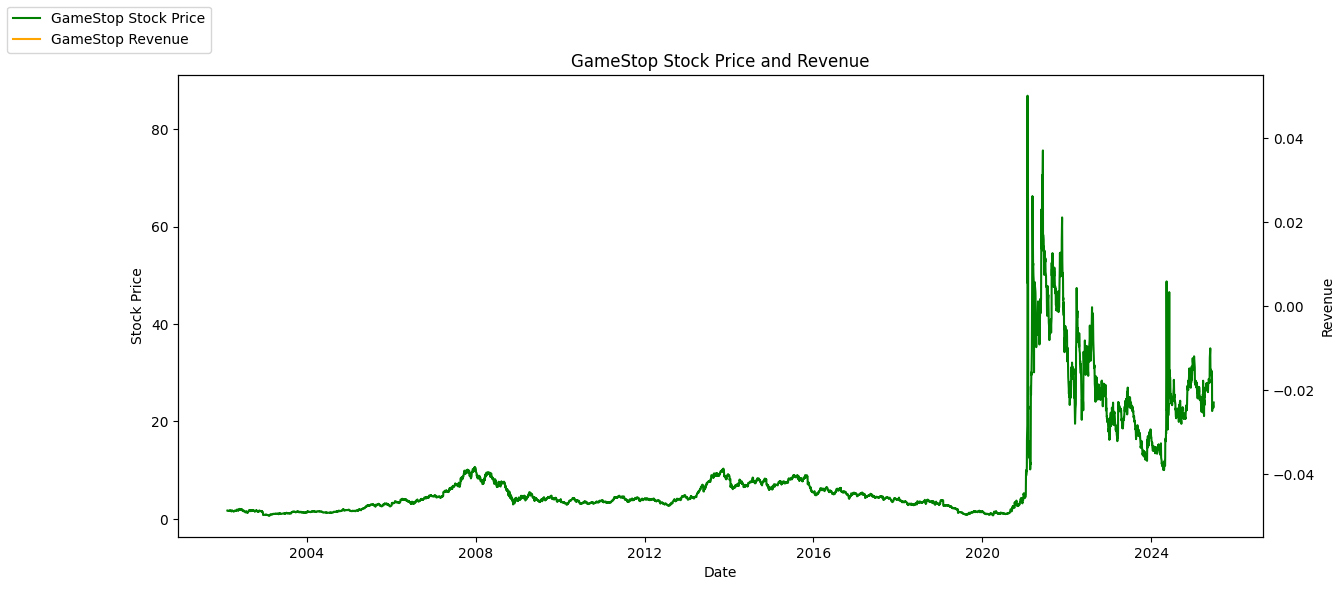

In [9]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Price', color='green')
ax2 = ax1.twinx()
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'].astype(float), label='GameStop Revenue', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax2.set_ylabel('Revenue')
plt.title('GameStop Stock Price and Revenue')
fig.legend(loc="upper left")
plt.show()
